In [1]:
import numpy as np
import matplotlib as plt
import hssm
%matplotlib inline
%config InlineBackend.figure_format='retina'

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\Saeed\miniconda3\envs\hssm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hssm.set_floatX("float32")

Setting PyTensor floatX type to float32.
Setting "jax_enable_x64" to False. If this is not intended, please set `jax` to False.


### Simulating a Data set

In [3]:
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.5]

In [4]:
dataset = hssm.simulate_data(
    model="ddm",
    theta=[v_true, a_true, z_true, t_true],
    size=1000,
)

In [5]:
dataset

,rt,response
0,4.196624,1.0
1,1.521869,1.0
2,2.182940,1.0
3,2.206116,1.0
4,1.103408,-1.0
...,...,...
995,1.321109,1.0
996,1.610834,1.0
997,1.476673,-1.0
998,1.331314,1.0


### Model Specification 

In [6]:
simple_ddm_model = hssm.HSSM(data=dataset)
simple_ddm_model

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)

a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)

z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)

t:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)


Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

### Visualizing the Model

In [7]:
import graphviz

In [9]:
simple_ddm_model.make_graph()

AttributeError: 'HSSM' object has no attribute 'make_graph'

In [10]:
simple_ddm_model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v]


c:\Users\Saeed\miniconda3\envs\hssm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 145 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [11]:
simple_ddm_model.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.485,0.029,1.433,1.540,0.001,0.0,2468.0,2483.0,1.0
t,0.486,0.022,0.444,0.527,0.000,0.0,2526.0,1922.0,1.0
v,0.562,0.034,0.495,0.623,0.001,0.0,2916.0,2965.0,1.0
z,0.481,0.013,0.457,0.507,0.000,0.0,2703.0,2860.0,1.0


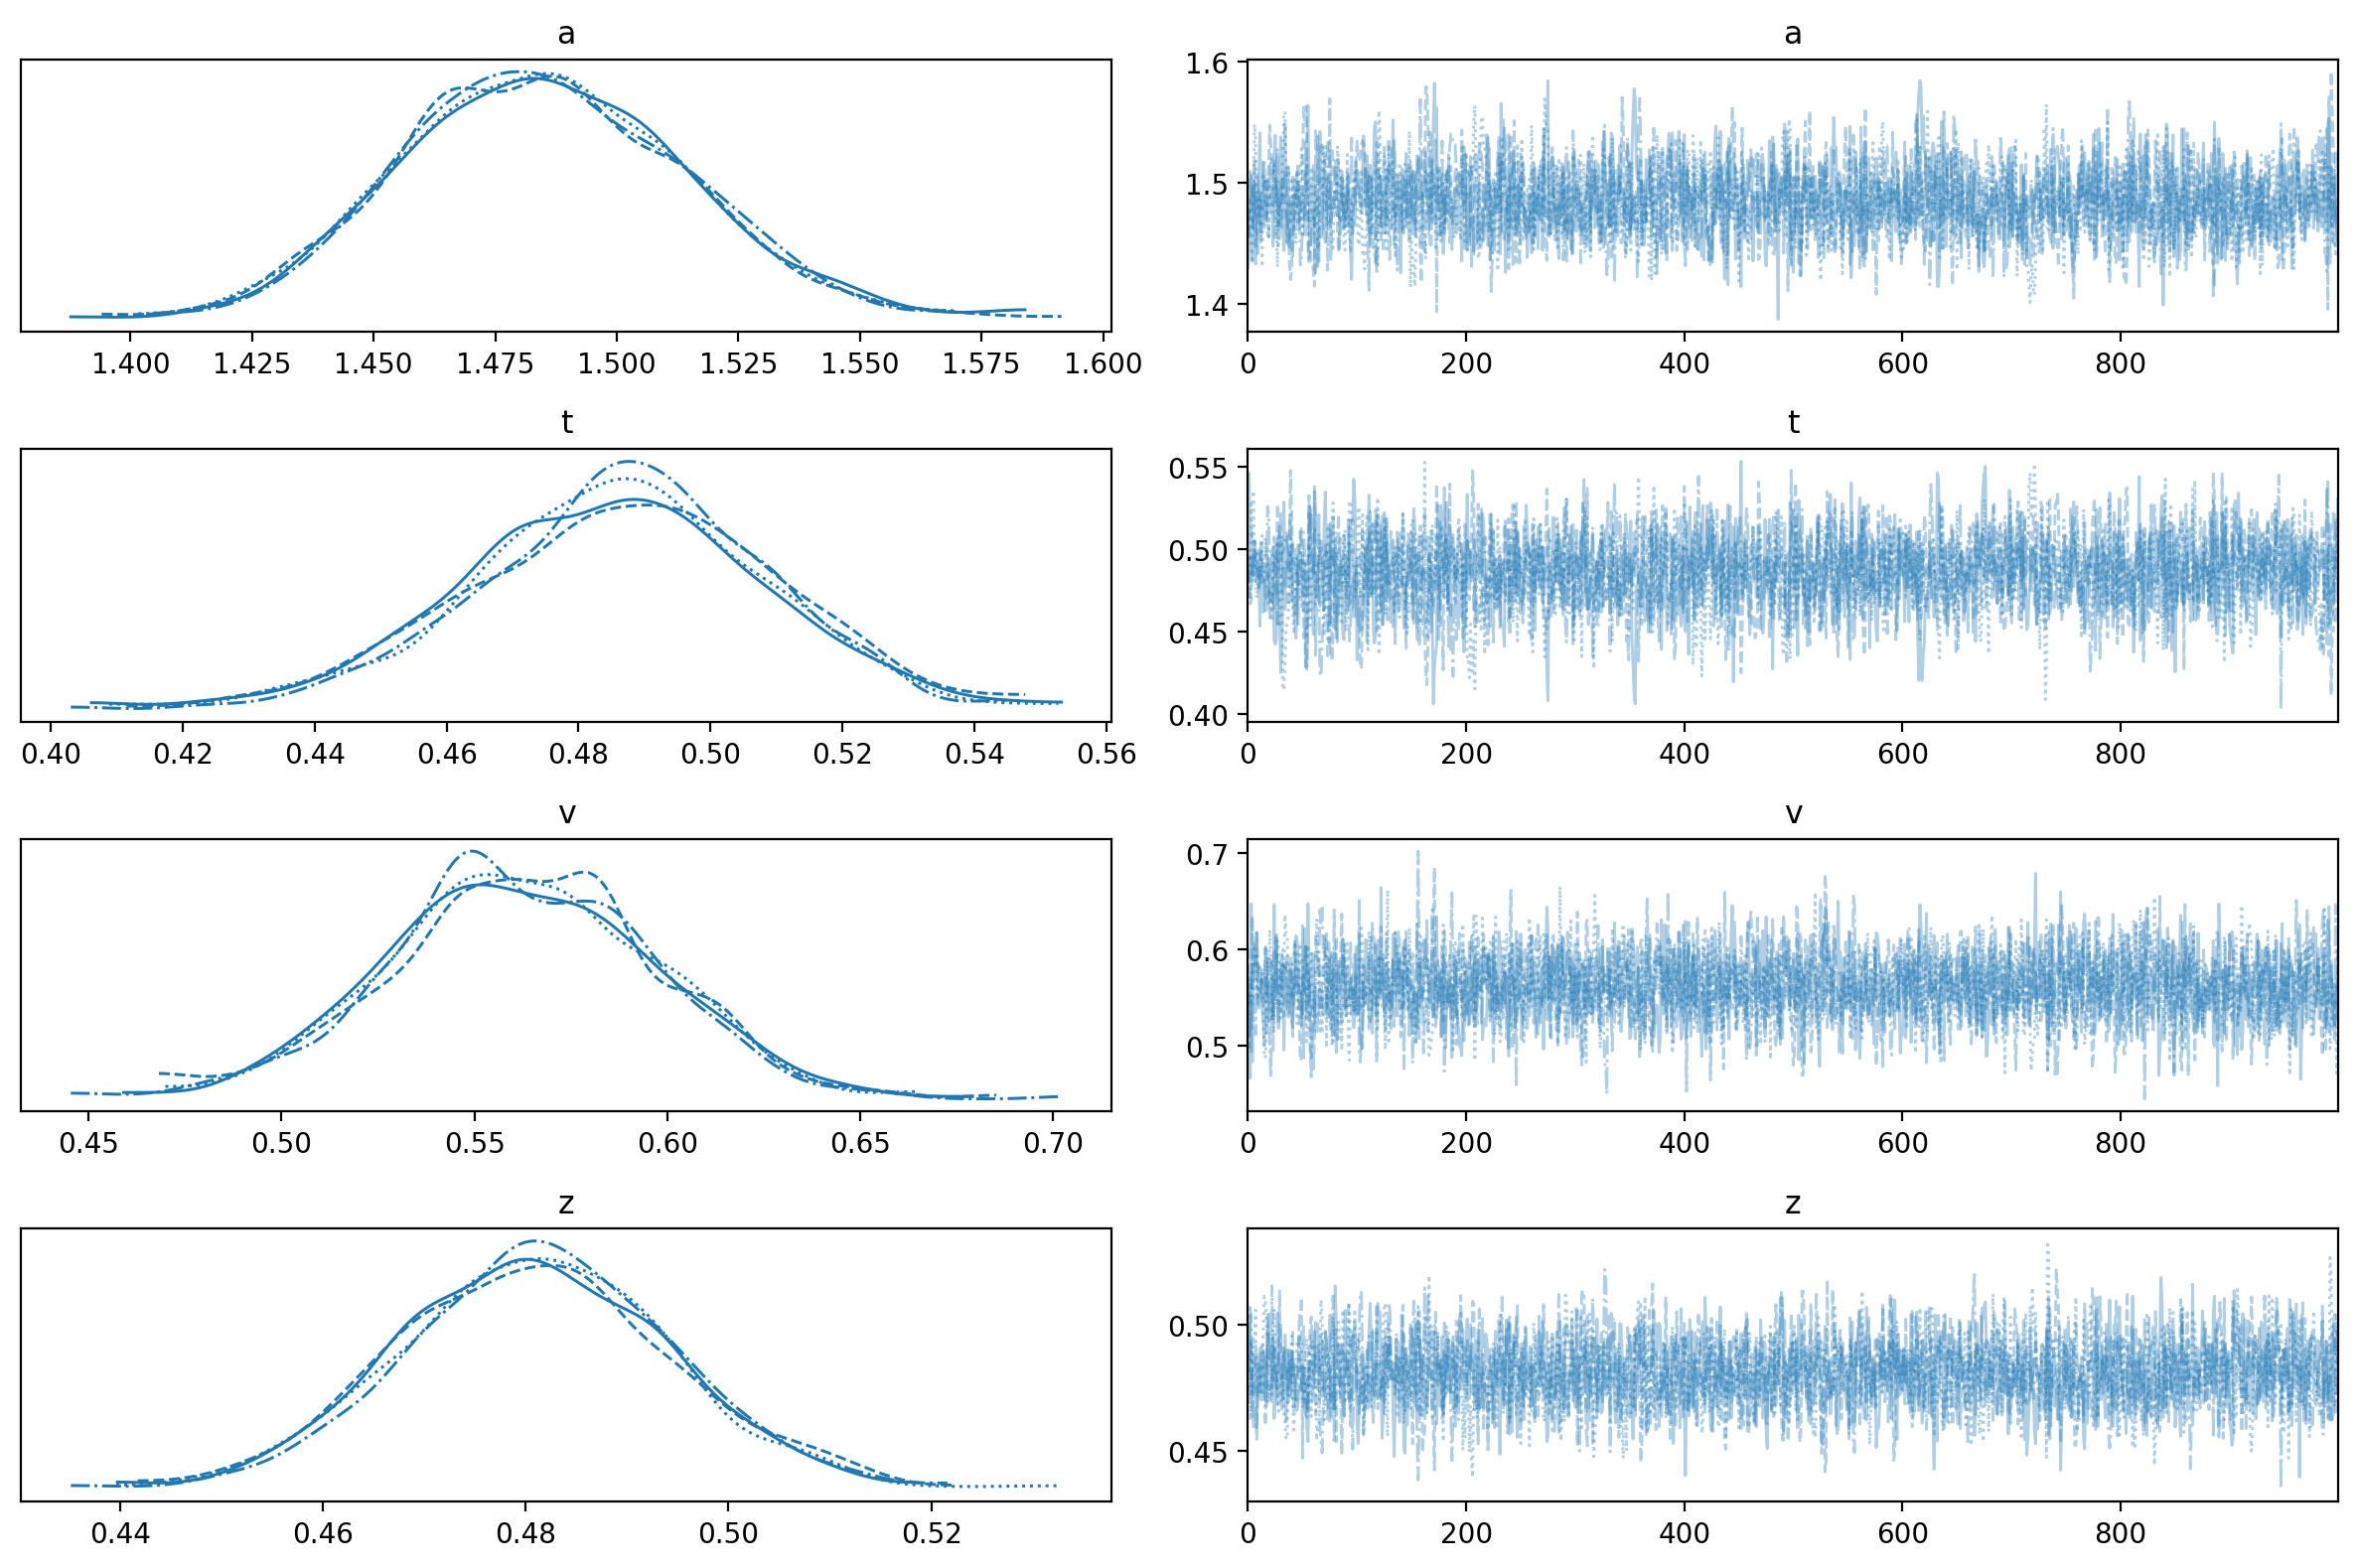

In [12]:
simple_ddm_model.plot_trace()